Cleaning Time Series Data : Time Series Talk

 https://www.youtube.com/watch?v=7_Js8h709Dw

In [72]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Transform cluttered data

### Merge de todos os dados Macro num só CSV

In [57]:
from pathlib import Path
import glob

path = r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\variables_data"
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

dfs = []
for file in files:
    # Leitura do CSV
    data = pd.read_csv(file)
    
    # Ajuste do nome da coluna de datas para um nome consistente
    if 'DATE' in data.columns:
        data.rename(columns={'DATE': 'Date'}, inplace=True)
    
    if 'date' in data.columns:
        data.rename(columns={'date': 'Date'}, inplace=True)

    data["Date"] = pd.to_datetime(data.Date)

    # Definir a coluna de datas como índice
    data.set_index('Date', inplace=True)
    
    # Adicionar o DataFrame à lista
    dfs.append(data)

# Juntar todos os DataFrames usando o método "outer"
df = pd.concat(dfs, axis=1, join='outer')

In [58]:
df_daily = df.resample("D").last()

In [104]:
df_daily_mod = df_daily.loc["2010-09-10":]
df_daily_mod

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-10,0.06180,7.128849e+02,5.942250e+02,NaN,1.269309,0.011915,0.00938,85.925018,41.027889,18.918182,...,19.975000,121.730003,19.420000,70.566566,55.395454,360.0,394.0,NaN,NaN,3.953550e+06
2010-09-11,0.06366,7.128849e+02,5.591766e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,305.0,330.0,NaN,NaN,3.961550e+06
2010-09-12,0.06150,7.128849e+02,9.393114e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,379.0,425.0,NaN,NaN,3.970400e+06
2010-09-13,0.06219,7.128849e+02,1.688811e+03,8682.7,1.271698,0.011861,0.00932,86.880722,41.600159,19.073298,...,20.040001,121.620003,19.540001,70.911400,55.537666,436.0,512.0,NaN,NaN,3.978950e+06
2010-09-14,0.06199,7.128849e+02,1.218628e+03,NaN,1.287200,0.011950,0.00928,86.826782,41.776257,19.045097,...,19.959999,124.019997,20.049999,71.594154,55.618946,424.0,459.0,NaN,NaN,3.989100e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,54031.82000,9.066650e+13,1.323774e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,548857.0,572484.0,7155.0,19.0,1.973616e+07
2024-08-06,56057.67000,9.066650e+13,6.808433e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,485173.0,502085.0,5944.0,28.0,1.973660e+07
2024-08-07,55130.45000,9.066650e+13,7.893852e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,380097.0,483579.0,5867.0,36.0,1.973698e+07


In [105]:
df_weekly_mod = df_daily_mod.resample('W-FRI').last() # close semanal à sexta feira

In [106]:
df_weekly_mod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 2010-09-10 to 2024-08-09
Freq: W-FRI
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BTC_USD             727 non-null    float64
 1   Mining_Difficulty   727 non-null    float64
 2   USD_OnChain_Volume  725 non-null    float64
 3   M2_Liquidity        721 non-null    float64
 4   EUR_USD             726 non-null    float64
 5   JPY_USD             726 non-null    float64
 6   JPY_EUR             726 non-null    float64
 7   SPY                 726 non-null    float64
 8   QQQ                 726 non-null    float64
 9   EXSA                726 non-null    float64
 10  JPXN                726 non-null    float64
 11  IWDA                726 non-null    float64
 12  GLD                 726 non-null    float64
 13  SLV                 726 non-null    float64
 14  TLT                 726 non-null    float64
 15  BND                 726 no

In [107]:
df_weekly_mod.isna().sum()

BTC_USD                 0
Mining_Difficulty       0
USD_OnChain_Volume      2
M2_Liquidity            6
EUR_USD                 1
JPY_USD                 1
JPY_EUR                 1
SPY                     1
QQQ                     1
EXSA                    1
JPXN                    1
IWDA                    1
GLD                     1
SLV                     1
TLT                     1
BND                     1
Nr_Transactions         0
Nr_Addresses            0
BTC_PageViews         251
Crypto_PageViews      251
BTC_Supply              0
dtype: int64

In [113]:
df_weekly_mod.interpolate(method='linear', inplace=True)
df_weekly_mod = df_weekly_mod.loc[df_weekly_mod.index[1]:]

In [114]:
df_weekly_mod.isna().sum()

BTC_USD                 0
Mining_Difficulty       0
USD_OnChain_Volume      0
M2_Liquidity            0
EUR_USD                 0
JPY_USD                 0
JPY_EUR                 0
SPY                     0
QQQ                     0
EXSA                    0
JPXN                    0
IWDA                    0
GLD                     0
SLV                     0
TLT                     0
BND                     0
Nr_Transactions         0
Nr_Addresses            0
BTC_PageViews         249
Crypto_PageViews      249
BTC_Supply              0
dtype: int64

In [116]:
df_weekly_mod.to_csv(f"df_weekly.csv", date_format='%Y-%m-%d')

# Read the Data

In [117]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [118]:
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))

In [119]:
opencsv

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,...,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-24,0.06220,9.178307e+02,1.059924e+03,8646.1,1.331913,0.011833,0.008880,88.973145,43.824387,18.875872,...,19.549999,126.690002,21.010000,71.380371,55.707008,501.0,572.0,NaN,NaN,4.091750e+06
2010-10-01,0.06197,1.318670e+03,2.111790e+03,8603.5,1.362212,0.011966,0.008780,88.810402,43.250763,18.551514,...,19.139999,128.910004,21.650000,72.414963,55.932384,584.0,672.0,NaN,NaN,4.157600e+06
2010-10-08,0.08685,1.318670e+03,8.206450e+03,8692.9,1.392796,0.012139,0.008710,90.305946,43.903801,18.791248,...,19.360001,131.660004,22.730000,72.144997,56.244728,363.0,454.0,NaN,NaN,4.206900e+06
2010-10-15,0.10500,1.378028e+03,4.345659e+03,8715.5,1.407202,0.012274,0.008720,91.204834,45.439342,19.016888,...,19.434999,133.679993,23.750000,69.410652,55.912010,328.0,403.0,NaN,NaN,4.267300e+06
2010-10-22,0.10900,2.149022e+03,2.832089e+03,8738.6,1.391692,0.012300,0.008840,91.708496,45.571720,19.164965,...,19.615000,129.729996,22.760000,70.179024,56.102158,602.0,764.0,NaN,NaN,4.349150e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,57913.68000,7.949520e+13,7.362339e+09,20947.5,1.087276,0.006321,0.005814,559.989990,494.820007,52.160000,...,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0,4441.0,29.0,1.972469e+07
2024-07-19,66708.49000,8.204773e+13,8.528315e+09,20947.5,1.090156,0.006363,0.005837,548.989990,475.239990,50.730000,...,94.370003,221.729996,26.690001,92.611282,72.498436,507940.0,510414.0,4161.0,27.0,1.972799e+07
2024-07-26,67925.17000,8.204773e+13,7.332171e+09,20947.5,1.085128,0.006506,0.005995,544.440002,462.970001,51.049999,...,93.745003,220.630005,25.480000,92.681046,72.717766,459067.0,529294.0,4953.0,48.0,1.973157e+07


**A VAR training model workflow**

![image info](./VAR_Training_Model_Worflow.png)

source: https://www.ikigailabs.io/multivariate-time-series-forecasting-in-python-settings/vector-autoregression-python

# ADF test

In [120]:
# Individual Test

from statsmodels.tsa.stattools import adfuller

# If p-value is not less than .05, we reject the null hypothesis. This means the time series is stationary.

# H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

# HA: The time series is stationary.

#perform augmented Dickey-Fuller test
adfuller(opencsv.BTC_USD)

(-0.2979862471286852,
 0.9257890560458235,
 20,
 704,
 {'1%': -3.4396728750301966,
  '5%': -2.8656541974330936,
  '10%': -2.5689608949670713},
 12652.597335230104)

In [121]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}
stationary = []
non_stationary = []

# Loop through each column in the DataFrame
for column in opencsv.columns:
    # Perform ADF test
    result = adfuller(opencsv[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       stationary.append(column)
    else:
        non_stationary.append(column) 

In [122]:
p_values

{'BTC_USD': 0.9257890560458235,
 'Mining_Difficulty': 1.0,
 'USD_OnChain_Volume': 0.7430567543859834,
 'M2_Liquidity': 0.8873061157523858,
 'EUR_USD': 0.42447573032952113,
 'JPY_USD': 0.827388688317822,
 'JPY_EUR': 0.0,
 'SPY': 0.9947047897800431,
 'QQQ': 0.996660211194525,
 'EXSA': 0.9363936151271631,
 'JPXN': 0.8265053851443229,
 'IWDA': 0.9966122599463695,
 'GLD': 0.9371186812168948,
 'SLV': 0.2743053325039636,
 'TLT': 0.31813718141781233,
 'BND': 0.5201032520140788,
 'Nr_Transactions': 0.8980168944840984,
 'Nr_Addresses': 0.5442222254197085,
 'BTC_PageViews': 8.508081202915592e-05,
 'Crypto_PageViews': 0.014412824426146423,
 'BTC_Supply': 7.255846366291162e-06}

In [123]:
stationary

['JPY_EUR', 'BTC_PageViews', 'Crypto_PageViews', 'BTC_Supply']

In [151]:
stationary_df = opencsv.copy()
stationary_df = stationary_df.drop(columns=[col for col in stationary_df.columns if col not in stationary])
stationary_df = stationary_df.iloc[1:]
stationary_df

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply
Date,,,,
2010-10-01,0.008780,NaN,NaN,4.157600e+06
2010-10-08,0.008710,NaN,NaN,4.206900e+06
2010-10-15,0.008720,NaN,NaN,4.267300e+06
2010-10-22,0.008840,NaN,NaN,4.349150e+06
2010-10-29,0.008890,NaN,NaN,4.423100e+06
...,...,...,...,...
2024-07-12,0.005814,4441.0,29.0,1.972469e+07
2024-07-19,0.005837,4161.0,27.0,1.972799e+07
2024-07-26,0.005995,4953.0,48.0,1.973157e+07


In [125]:
non_stationary

['BTC_USD',
 'Mining_Difficulty',
 'USD_OnChain_Volume',
 'M2_Liquidity',
 'EUR_USD',
 'JPY_USD',
 'SPY',
 'QQQ',
 'EXSA',
 'JPXN',
 'IWDA',
 'GLD',
 'SLV',
 'TLT',
 'BND',
 'Nr_Transactions',
 'Nr_Addresses']

In [126]:
modify_df = opencsv.copy()
modify_df.drop(columns=stationary, inplace=True)
modify_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-09-24,0.06220,9.178307e+02,1.059924e+03,8646.1,1.331913,0.011833,88.973145,43.824387,18.875872,33.412502,19.549999,126.690002,21.010000,71.380371,55.707008,501.0,572.0
2010-10-01,0.06197,1.318670e+03,2.111790e+03,8603.5,1.362212,0.011966,88.810402,43.250763,18.551514,33.412502,19.139999,128.910004,21.650000,72.414963,55.932384,584.0,672.0
2010-10-08,0.08685,1.318670e+03,8.206450e+03,8692.9,1.392796,0.012139,90.305946,43.903801,18.791248,34.475803,19.360001,131.660004,22.730000,72.144997,56.244728,363.0,454.0
2010-10-15,0.10500,1.378028e+03,4.345659e+03,8715.5,1.407202,0.012274,91.204834,45.439342,19.016888,34.359402,19.434999,133.679993,23.750000,69.410652,55.912010,328.0,403.0
2010-10-22,0.10900,2.149022e+03,2.832089e+03,8738.6,1.391692,0.012300,91.708496,45.571720,19.164965,34.312820,19.615000,129.729996,22.760000,70.179024,56.102158,602.0,764.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,57913.68000,7.949520e+13,7.362339e+09,20947.5,1.087276,0.006321,559.989990,494.820007,52.160000,75.629997,96.339996,223.110001,28.120001,93.627892,72.757645,658355.0,486027.0
2024-07-19,66708.49000,8.204773e+13,8.528315e+09,20947.5,1.090156,0.006363,548.989990,475.239990,50.730000,74.550003,94.370003,221.729996,26.690001,92.611282,72.498436,507940.0,510414.0
2024-07-26,67925.17000,8.204773e+13,7.332171e+09,20947.5,1.085128,0.006506,544.440002,462.970001,51.049999,73.260002,93.745003,220.630005,25.480000,92.681046,72.717766,459067.0,529294.0


<Axes: xlabel='Date'>

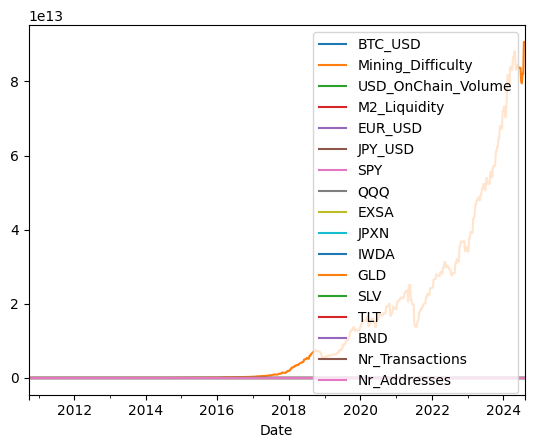

In [127]:
modify_df.plot.line()

# Normalize

In [128]:
normalized_df = modify_df.copy()
avgs = normalized_df.mean()
devs = normalized_df.std()

In [129]:
for column in normalized_df.columns:
    normalized_df[column] = (normalized_df[column] - avgs.loc[column]) / devs.loc[column]

In [130]:
normalized_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-09-24,-0.689891,-0.628174,-0.682885,-1.420701,1.288108,1.473121,-1.313805,-1.129267,-1.366709,-1.437396,-1.346397,-0.688026,0.028633,-1.553042,-1.765076,-1.446982,-1.502686
2010-10-01,-0.689891,-0.628174,-0.682884,-1.430668,1.557110,1.552562,-1.315135,-1.134097,-1.403124,-1.437396,-1.366661,-0.607570,0.131513,-1.501182,-1.730431,-1.446415,-1.502322
2010-10-08,-0.689890,-0.628174,-0.682882,-1.409751,1.828637,1.655732,-1.302918,-1.128599,-1.376209,-1.346572,-1.355788,-0.507907,0.305123,-1.514714,-1.682419,-1.447925,-1.503116
2010-10-15,-0.689889,-0.628174,-0.682883,-1.404463,1.956530,1.736659,-1.295575,-1.115670,-1.350877,-1.356515,-1.352081,-0.434700,0.469088,-1.651776,-1.733563,-1.448164,-1.503301
2010-10-22,-0.689889,-0.628174,-0.682884,-1.399058,1.818828,1.751978,-1.291461,-1.114556,-1.334252,-1.360494,-1.343185,-0.577853,0.309946,-1.613261,-1.704334,-1.446292,-1.501987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,2.523742,3.130655,2.075932,1.457478,-0.883788,-1.816703,2.533807,2.667865,2.370102,2.168702,2.448871,2.806348,1.171565,-0.437857,0.855911,3.047182,0.264739
2024-07-19,3.011767,3.251348,2.512847,1.457478,-0.858216,-1.791470,2.443951,2.503013,2.209556,2.076452,2.351506,2.756335,0.941692,-0.488815,0.816066,2.019614,0.353526
2024-07-26,3.079281,3.251348,2.064627,1.457478,-0.902852,-1.706142,2.406783,2.399706,2.245482,1.966264,2.320616,2.716470,0.747185,-0.485319,0.849781,1.685736,0.422264


<Axes: xlabel='Date'>

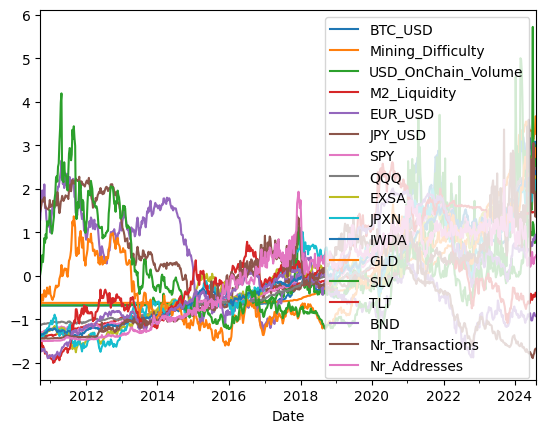

In [131]:
normalized_df.plot.line()

# Take First Difference to Remove Trend

In [132]:
differenced_df = normalized_df.copy()
differenced_df = differenced_df.diff()

In [150]:
differenced_df = differenced_df.iloc[1:]
differenced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-10-08,1.380594e-06,0.000000e+00,2.283792e-06,0.020917,0.271527,0.103169,0.012217,0.005498,0.026915,0.090824,0.010873,0.099663,0.173610,-0.013532,0.048013,-0.001510,-0.000794
2010-10-15,1.007146e-06,2.806644e-12,-1.446716e-06,0.005288,0.127894,0.080927,0.007343,0.012928,0.025333,-0.009943,0.003707,0.073207,0.163965,-0.137062,-0.051145,-0.000239,-0.000186
2010-10-22,2.219605e-07,3.645539e-11,-5.671653e-07,0.005405,-0.137702,0.015319,0.004114,0.001115,0.016625,-0.003979,0.008896,-0.143153,-0.159142,0.038516,0.029229,0.001872,0.001314
2010-10-29,4.494699e-06,0.000000e+00,2.746121e-06,-0.016542,-0.123251,-0.034065,0.000886,0.004012,-0.015833,-0.043755,-0.002224,0.104737,0.226657,-0.033311,0.008354,-0.000922,-0.000808
2010-11-05,4.100719e-06,4.457512e-11,-5.809904e-07,0.008797,0.399423,0.081690,0.026775,0.011071,0.046706,0.088173,0.023723,0.136267,0.326322,-0.073831,0.014439,-0.000171,-0.000189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,7.033039e-02,-2.776889e-02,-3.638643e+00,0.000000,0.070534,0.079835,0.043703,-0.011282,0.084203,0.132396,0.049671,0.079006,-0.057870,0.068945,0.088885,1.146458,-0.089788
2024-07-19,4.880250e-01,1.206933e-01,4.369148e-01,0.000000,0.025572,0.025232,-0.089856,-0.164853,-0.160546,-0.092250,-0.097365,-0.050013,-0.229872,-0.050959,-0.039845,-1.027568,0.088787
2024-07-26,6.751371e-02,-3.108624e-15,-4.482194e-01,0.000000,-0.044636,0.085328,-0.037168,-0.103306,0.035926,-0.110188,-0.030890,-0.039865,-0.194507,0.003497,0.033715,-0.333878,0.068738


<Axes: xlabel='Date'>

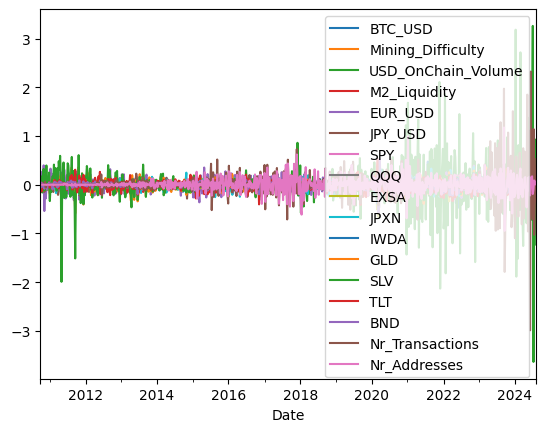

In [134]:
differenced_df.plot.line()

# Remove Increasing Volatility

In [135]:
annual_volatility = differenced_df.groupby(differenced_df.index.year).std()
annual_volatility

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010,0.000002,5.848679e-11,0.000003,0.009535,0.243935,0.080633,0.011598,0.005825,0.029814,0.056086,0.012188,0.102726,0.174181,0.056585,0.045387,0.023785,0.000921
2011,0.000134,5.228877e-09,0.001103,0.012629,0.188453,0.102537,0.023670,0.013625,0.060914,0.083980,0.024950,0.172483,0.442154,0.094403,0.042431,0.006458,0.009376
2012,0.000039,4.960727e-09,0.000517,0.014900,0.122411,0.079028,0.014710,0.009486,0.038379,0.055212,0.016521,0.113974,0.163845,0.095178,0.034607,0.054327,0.017854
2013,0.005871,2.543815e-06,0.023088,0.014282,0.119403,0.090021,0.014741,0.008804,0.040392,0.075852,0.020488,0.130902,0.140778,0.078374,0.049699,0.062962,0.043082
2014,0.005597,5.664189e-05,0.046873,0.012550,0.075650,0.063704,0.020497,0.012508,0.056429,0.076800,0.028662,0.082731,0.085600,0.064408,0.033857,0.045664,0.055549
2015,0.001331,1.200205e-04,0.010909,0.014277,0.148234,0.049790,0.026951,0.021232,0.080828,0.075221,0.045869,0.081364,0.078761,0.104872,0.051659,0.161407,0.121609
2016,0.002264,3.556841e-04,0.018466,0.013782,0.108400,0.098951,0.024593,0.018871,0.073678,0.085008,0.041174,0.097543,0.095656,0.101628,0.052842,0.154947,0.134993
2017,0.059110,3.189516e-03,0.162494,0.015405,0.094065,0.055336,0.013134,0.014669,0.038457,0.045118,0.022595,0.068259,0.069632,0.068708,0.037136,0.270018,0.236737
2018,0.056160,1.258020e-02,0.176159,0.016292,0.096830,0.048893,0.050477,0.040620,0.066967,0.110359,0.046689,0.051451,0.043469,0.065495,0.038084,0.135736,0.185617


In [136]:
vol_reduced_df = pd.DataFrame(index=differenced_df.index)

for column in differenced_df.columns:
    # Map each date to its corresponding annual volatility
    annual_vol_map = differenced_df.index.map(lambda d: annual_volatility.loc[d.year, column])
    
    # Divide the differenced data by the annual volatility
    vol_reduced_df[column] = differenced_df[column] / annual_vol_map

In [137]:
vol_reduced_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-10-01,-0.006453,3.240591e-01,0.144186,-1.045370,1.102760,0.985218,-0.114626,-0.829150,-1.221414,0.000000,-1.662640,0.783207,0.590648,0.916498,0.763310,0.023839,0.395263
2010-10-08,0.698083,0.000000e+00,0.835431,2.193804,1.113112,1.279497,1.053368,0.943941,0.902754,1.619387,0.892154,0.970188,0.996720,-0.239151,1.057854,-0.063475,-0.861674
2010-10-15,0.509253,4.798766e-02,-0.529221,0.554586,0.524294,1.003652,0.633120,2.219565,0.849676,-0.177277,0.304137,0.712643,0.941347,-2.422232,-1.126858,-0.010053,-0.201584
2010-10-22,0.112232,6.233099e-01,-0.207474,0.566855,-0.564504,0.189988,0.354748,0.191347,0.557604,-0.070942,0.729941,-1.393542,-0.913660,0.680666,0.643997,0.078697,1.426901
2010-10-29,2.272698,0.000000e+00,1.004555,-1.734921,-0.505260,-0.422471,0.076430,0.688825,-0.531037,-0.780145,-0.182485,1.019579,1.301273,-0.588682,0.184067,-0.038774,-0.877485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,0.309319,-2.242442e-01,-2.622505,0.000000,1.115240,1.707195,0.784714,-0.131302,1.117557,1.091928,0.865489,0.556591,-0.349113,0.863021,1.144439,1.194112,-0.481849
2024-07-19,2.146378,9.746434e-01,0.314901,0.000000,0.404322,0.539564,-1.613438,-1.918583,-2.130810,-0.760826,-1.696530,-0.352337,-1.386759,-0.637882,-0.513027,-1.070280,0.476476
2024-07-26,0.296931,-2.510331e-14,-0.323048,0.000000,-0.705748,1.824648,-0.667375,-1.202297,0.476824,-0.908770,-0.538241,-0.280845,-1.173412,0.043774,0.434098,-0.347757,0.368880


<Axes: xlabel='Date'>

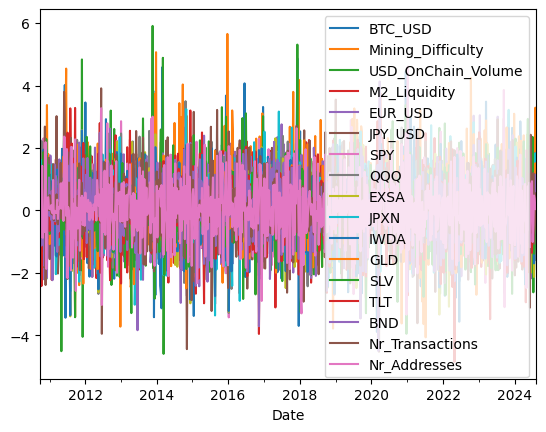

In [138]:
vol_reduced_df.plot.line()

# Remove Seasonality

In [139]:
month_avgs = vol_reduced_df.groupby(vol_reduced_df.index.month).mean()
month_avgs

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
1,-0.057726,0.332598,0.018845,-0.300014,-0.049658,0.050940,0.206303,0.238132,0.187536,0.153079,0.202069,0.281158,0.183899,0.048149,0.165753,-0.042723,0.018585
2,0.051602,0.360383,-0.031686,0.227775,-0.013039,-0.119933,0.299887,0.216869,0.134265,0.146291,0.229059,0.069046,0.022456,-0.154078,-0.109792,0.082957,0.067347
3,0.073667,0.174405,0.003013,0.544806,-0.085229,-0.125018,0.162779,0.138841,0.099747,0.056787,0.147460,0.067088,-0.050672,0.070035,0.039098,-0.062840,0.011970
4,0.059774,0.242761,-0.025558,0.157348,0.055098,-0.161826,0.164421,0.146589,0.240531,-0.070114,0.116006,0.107049,-0.004191,0.000371,0.159775,0.190610,0.131631
5,0.020513,0.232884,0.092791,-0.038871,-0.132650,-0.070459,0.084262,0.138516,0.107509,-0.022729,0.077954,-0.145128,-0.113581,0.020718,0.140415,-0.057680,-0.080223
6,0.170581,0.287993,-0.012368,0.222240,0.041701,-0.044146,0.153984,0.127571,-0.183167,0.142427,0.059937,-0.037230,-0.112870,0.063759,0.092722,0.097578,0.135518
7,0.135410,0.162987,-0.074038,0.196386,0.010064,0.196317,0.392756,0.439034,0.240023,0.130812,0.295391,0.139483,0.140325,0.188236,0.350700,-0.037336,-0.043047
8,-0.145351,0.564304,0.013119,0.307659,-0.058476,0.034063,-0.113802,0.010564,-0.183964,-0.183092,-0.087901,0.201906,0.082311,0.156229,0.160874,0.052972,0.024611
9,-0.046131,0.665767,-0.000349,0.120113,-0.201103,-0.228364,-0.009247,-0.024187,0.024442,0.184920,0.056401,-0.292547,-0.272580,-0.175936,-0.142596,-0.003120,0.046131


In [140]:
unseasoned_df = pd.DataFrame(index=vol_reduced_df.index)

for column in vol_reduced_df.columns:
    # Map each date to its corresponding monthly average
    monthly_avg = vol_reduced_df.index.map(lambda d: month_avgs.loc[d.month, column])
    
    # Divide the differenced data by the annual volatility
    unseasoned_df[column] = vol_reduced_df[column] - monthly_avg

In [141]:
unseasoned_df

,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,
2010-10-01,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,-0.378162,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,0.789831,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,0.369584,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,0.091212,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,-0.187107,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12,0.173909,-0.387231,-2.548467,-0.196386,1.105177,1.510878,0.391958,-0.570336,0.877535,0.961116,0.570098,0.417108,-0.489437,0.674785,0.793739,1.231448,-0.438803
2024-07-19,2.010968,0.811656,0.388939,-0.196386,0.394258,0.343247,-2.006194,-2.357618,-2.370832,-0.891638,-1.991920,-0.491820,-1.527084,-0.826117,-0.863727,-1.032944,0.519523
2024-07-26,0.161521,-0.162987,-0.249010,-0.196386,-0.715811,1.628331,-1.060131,-1.641331,0.236801,-1.039582,-0.833632,-0.420328,-1.313737,-0.144462,0.083399,-0.310420,0.411927


<Axes: xlabel='Date'>

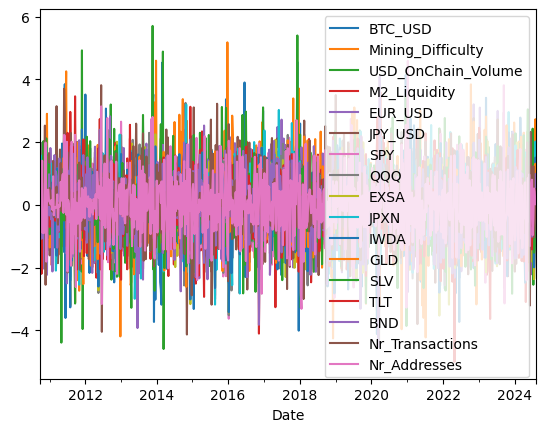

In [142]:
unseasoned_df.plot.line()

In [143]:
# Data Frame Test

from statsmodels.tsa.stattools import adfuller

# Dictionary to store the p-values
p_values = {}

# Loop through each column in the DataFrame
for column in unseasoned_df.columns:
    # Perform ADF test
    result = adfuller(unseasoned_df[column].dropna())  # Drop NA values if any
    p_values[column] = result[1]  # Store the p-value (result[1] is the p-value)

    if p_values[column] < 0.05:
       pass
    else:
        print(f"Non-Stationary: {column}")

In [144]:
p_values

{'BTC_USD': 0.0,
 'Mining_Difficulty': 2.3521238661816585e-10,
 'USD_OnChain_Volume': 1.158696081298534e-28,
 'M2_Liquidity': 0.0015012619863709674,
 'EUR_USD': 0.0,
 'JPY_USD': 0.0,
 'SPY': 0.0,
 'QQQ': 0.0,
 'EXSA': 0.0,
 'JPXN': 0.0,
 'IWDA': 1.9807118153269038e-29,
 'GLD': 9.399082433406543e-30,
 'SLV': 0.0,
 'TLT': 8.999456482943494e-23,
 'BND': 0.0,
 'Nr_Transactions': 2.0494140219275158e-29,
 'Nr_Addresses': 0.0}

In [145]:
full_clean_df = pd.merge(stationary_df, unseasoned_df, left_index=True, right_index=True, how='outer')

In [146]:
full_clean_df.head(20)

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-01,0.00878,NaN,NaN,4157600.0,-0.291692,-0.080586,-0.042738,-1.309421,1.094003,1.109584,...,-1.079620,-1.326496,-0.048535,-1.813269,0.660546,0.505392,1.135990,0.806592,-0.017511,0.372463
2010-10-08,0.00871,NaN,NaN,4206900.0,0.412845,-0.404645,0.648508,1.929753,1.104355,1.403863,...,0.693472,0.797672,1.570852,0.741525,0.847527,0.911464,-0.019659,1.101136,-0.104825,-0.884474
2010-10-15,0.00872,NaN,NaN,4267300.0,0.224014,-0.356657,-0.716145,0.290535,0.515537,1.128018,...,1.969096,0.744594,-0.225812,0.153508,0.589983,0.856091,-2.202740,-1.083577,-0.051403,-0.224384
2010-10-22,0.00884,NaN,NaN,4349150.0,-0.173006,0.218665,-0.394398,0.302804,-0.573261,0.314354,...,-0.059123,0.452523,-0.119477,0.579312,-1.516202,-0.998916,0.900158,0.687278,0.037347,1.404101
2010-10-29,0.00889,NaN,NaN,4423100.0,1.987460,-0.404645,0.817632,-1.998972,-0.514017,-0.298105,...,0.438356,-0.636118,-0.828680,-0.333114,0.896919,1.216017,-0.369190,0.227349,-0.080124,-0.900285
2010-11-05,0.00870,NaN,NaN,4492800.0,1.762942,0.416358,-0.418757,0.497356,1.805772,1.318915,...,1.566387,1.370509,1.308579,1.613629,1.527492,2.031591,-1.455509,0.202510,-0.167310,-0.408236
2010-11-12,0.00891,NaN,NaN,4569900.0,-0.189895,0.822122,-0.926851,1.125559,-2.040763,-1.511189,...,-1.813973,-0.541204,-0.712729,0.072649,-0.748044,-0.469439,-1.485706,-1.891312,-0.204935,-0.894410
2010-11-19,0.00876,NaN,NaN,4646400.0,0.020540,1.538351,0.024618,0.050742,0.300382,-0.909174,...,-0.385292,-0.116395,1.261276,-0.292322,-0.324691,1.284050,0.329103,-0.300183,2.524182,0.141180
2010-11-26,0.00896,NaN,NaN,4701950.0,-0.187089,-0.345782,2.093927,-1.009351,-0.987368,0.210454,...,0.048445,-1.151893,-1.481040,0.782309,0.522022,-0.404837,0.144541,0.022784,-2.549184,1.983107


In [147]:
full_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 724 entries, 2010-10-01 to 2024-08-09
Freq: W-FRI
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             724 non-null    float64
 1   BTC_PageViews       476 non-null    float64
 2   Crypto_PageViews    476 non-null    float64
 3   BTC_Supply          724 non-null    float64
 4   BTC_USD             724 non-null    float64
 5   Mining_Difficulty   724 non-null    float64
 6   USD_OnChain_Volume  724 non-null    float64
 7   M2_Liquidity        724 non-null    float64
 8   EUR_USD             724 non-null    float64
 9   JPY_USD             724 non-null    float64
 10  SPY                 724 non-null    float64
 11  QQQ                 724 non-null    float64
 12  EXSA                724 non-null    float64
 13  JPXN                724 non-null    float64
 14  IWDA                724 non-null    float64
 15  GLD                 724 no

In [148]:
full_clean_df.isnull().sum()

JPY_EUR                 0
BTC_PageViews         248
Crypto_PageViews      248
BTC_Supply              0
BTC_USD                 0
Mining_Difficulty       0
USD_OnChain_Volume      0
M2_Liquidity            0
EUR_USD                 0
JPY_USD                 0
SPY                     0
QQQ                     0
EXSA                    0
JPXN                    0
IWDA                    0
GLD                     0
SLV                     0
TLT                     0
BND                     0
Nr_Transactions         0
Nr_Addresses            0
dtype: int64

In [149]:
full_clean_df.to_csv("full_clean_df.csv", date_format='%Y-%m-%d')